<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_2/ds_mod2_lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Mind the path for the csv file in your gdrive
!cp "/content/drive/MyDrive/alura/bootcamp-data-science/A160324189_28_143_208.csv" .
pd.options.display.float_format = "{:,.2f}".format
dados = pd.read_csv("https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/module_1/files/A160324189_28_143_208.csv", encoding="ISO-8859-1",
            skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",",
            engine='python')
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6
ordenado_por_total.index = ordenado_por_total.index.str[3:]
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


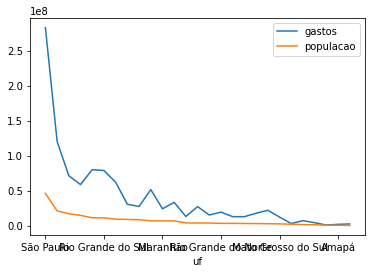

In [11]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
df_pop_por_uf = pd.read_html(url)
df_pop_por_uf = df_pop_por_uf[0]

def clean_n_join(df_dirty, df_ref):
  df_ref_c = df_ref.copy()
  df_dirty_c = df_dirty.copy()
  df_dirty_c = df_dirty_c[["Unidade federativa", "População"]]
  df_dirty_c.columns = ["uf", "populacao"]
  df_dirty_c = df_dirty_c.set_index("uf")
  df_dirty_c = df_dirty_c.dropna()
  df_dirty_c['populacao'] = df_dirty_c['populacao'].str.replace(" ","").astype(int)
  df_dirty_c.index = df_dirty_c.index.str.strip()
  # df_ref_c.index = df_ref_c.index.str[3:]
  for estado in df_ref_c.index:
    df_dirty_c.index = df_dirty_c.index.str.replace(f"{estado} {estado}", estado)
  return df_dirty_c.join(df_ref_c)

gastos_e_populacao_recente = clean_n_join(df_pop_por_uf, gastos_do_mais_recente)
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/Jul"] * 10**6
gastos_e_populacao_recente["gastos_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente[["gastos", "populacao"]].plot()

In [3]:
def gasos_e_gasto_por_habitante_para(todos_os_gastos, dados, mes: str):
  dados_c = dados.copy()
  todos_os_gastos_c = todos_os_gastos.copy()
  gastos_do_mes = todos_os_gastos_c[mes]
  gastos_do_mes.index = gastos_do_mes.index.str[3:]
  dados_c[f"gastos_{mes}"] = gastos_do_mes * 10**6
  dados_c[f"gastos_por_habitante_{mes}"] = dados_c[f"gastos_{mes}"] / dados_c["populacao"]
  return dados_c

In [8]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,250.79,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,115.49,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.12,95.84,103.03,98.55,94.37,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,43.01,60.87,40.66,52.75,48.90,51.17,57.23,53.49,51.22,48.48,48.67,49.69,44.41,55.99,44.82,54.46,78.12,56.01,51.44,53.86,57.87,53.74,52.37,50.22,50.89,74.01,61.11,55.32,55.81,59.07,...,64.52,74.32,69.85,73.15,74.54,68.73,73.08,69.26,67.32,72.34,65.02,74.39,74.52,79.26,75.91,77.49,78.78,72.84,79.14,73.95,70.69,79.47,73.80,74.92,76.67,82.44,78.19,87.98,83.31,81.15,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


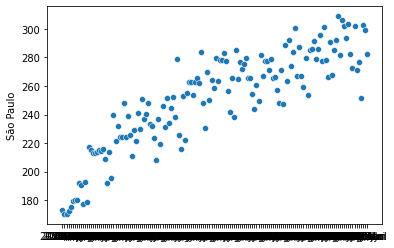

In [12]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])

In [15]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


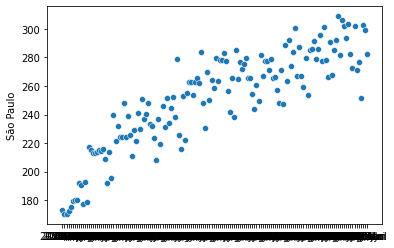

In [16]:
sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")

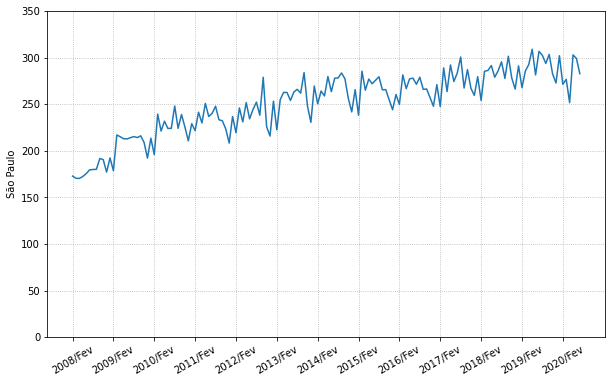

In [30]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
# ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(True, linestyle=":")
plt.show()

# Desafio

## Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

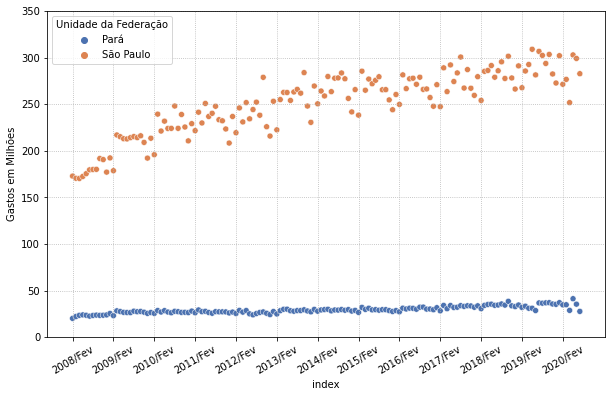

In [79]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=30)
m = mensal[["Pará","São Paulo"]].reset_index().melt('index',value_name="Gastos em Milhões")
ax = sns.scatterplot(x="index", y="Gastos em Milhões", hue='Unidade da Federação', data=m, palette="deep")
plt.ylim(0, 350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(True, linestyle=":")
plt.show()

## Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

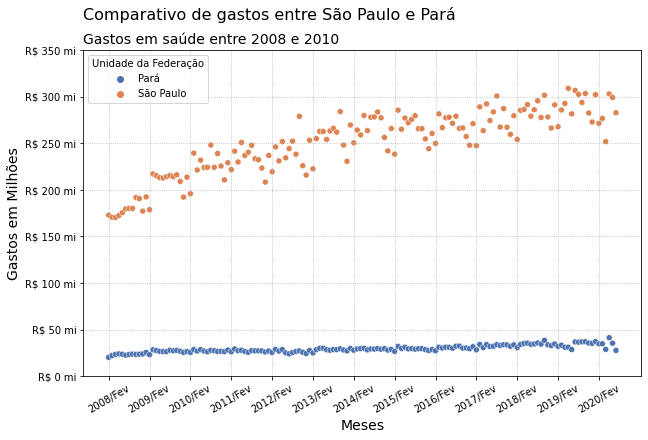

In [148]:
GRAY6 = '#828282'
fig = plt.figure(figsize=(10,6))
plt.xticks(rotation=30)
m = mensal[["Pará","São Paulo"]].reset_index().melt('index',value_name="Gastos em Milhões")
ax = sns.scatterplot(x="index", y="Gastos em Milhões", hue='Unidade da Federação', data=m, palette="deep")
plt.ylim(0, 350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f} mi"))
ax.set_xlabel("Meses", fontsize = 14)
ax.set_ylabel("Gastos em Milhões", fontsize = 14)
lp = plt.title("Gastos em saúde entre 2008 e 2010", fontsize = 14, loc="left")
plt.suptitle("Comparativo de gastos entre São Paulo e Pará", fontsize = 16, ha='right', x=0.6416)
plt.grid(True, linestyle=":")
plt.show()